##**PREDICTION USING UNSUPERVISED MACHINE LEARNING**

###**TASK-2**

###We are provided with the very famous ‘Iris’ dataset, from which we need to predict the optimum number of clusters and represent it visually using K-MEANS clustering.

##STEP-I


*  Import libraries like numpy , panda ,seaborn,matplotlib.pyplot
*  Load the iris data set
* Analyze the data set



In [2]:
import pandas as pd

# We'll  import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
iris = pd.read_csv("Iris.csv") # we read the iris dataset
#we analyze the iris dataset
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


####We code to find the size of iris data set

In [3]:
iris.shape

(150, 6)

In [4]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


####Frequency distribution of species

In [5]:
iris["Species"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

##STEP-II

####We use different visualisation techniques to understant the realtion between features and target better

*   we make scatter plot between petal_length,petal_width,sepal_length,sepal_width to see the distribution of species among them.
*  we make a pair plot with all the four features.
* Box plot and histograms help us understand our data better.



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


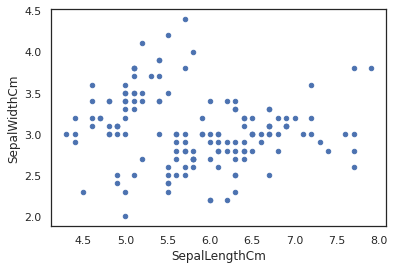

In [6]:
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


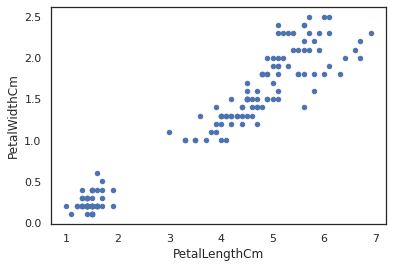

In [7]:
iris.plot(kind="scatter", x="PetalLengthCm", y="PetalWidthCm")

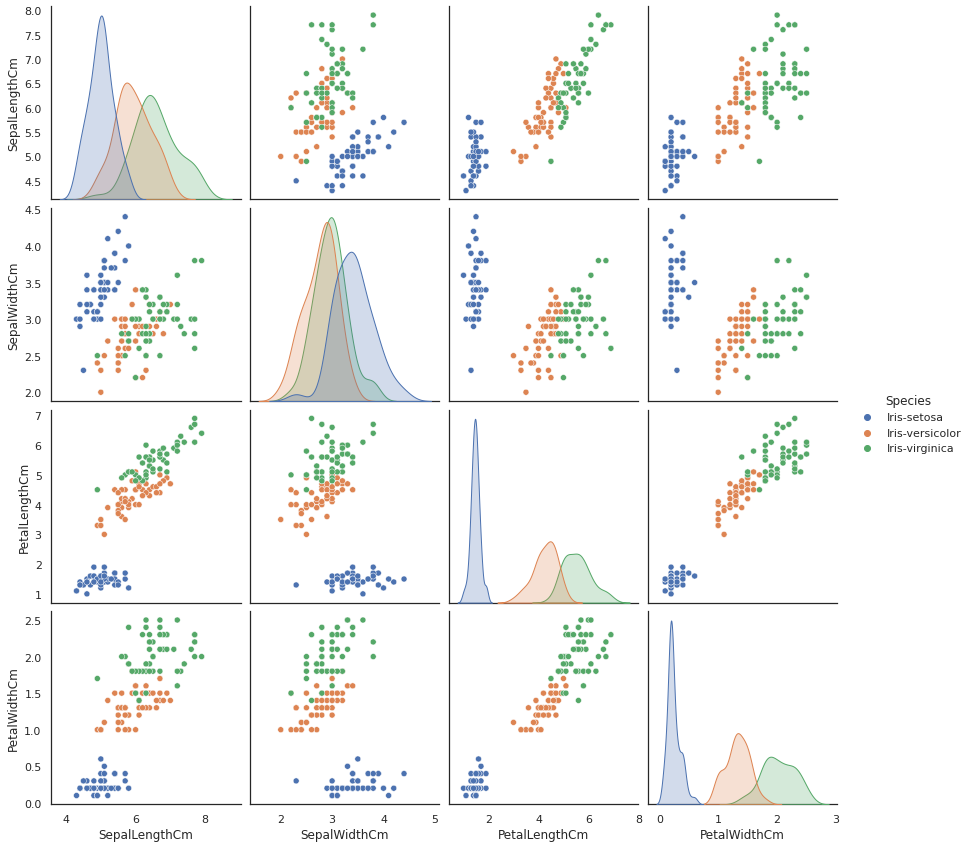

In [8]:
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa846af1e80>,
      dtype=object)

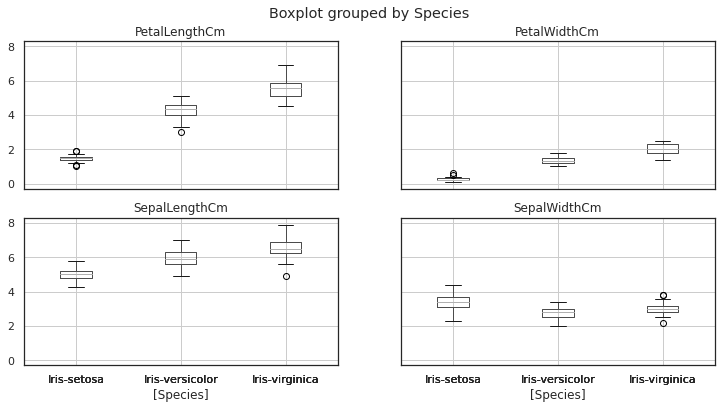

In [9]:
iris.drop("Id", axis=1).boxplot(by="Species", figsize=(12, 6))

In [10]:

iris_setosa=iris.loc[iris["Species"]=="Iris-setosa"]
iris_virginica=iris.loc[iris["Species"]=="Iris-virginica"]
iris_versicolor=iris.loc[iris["Species"]=="Iris-versicolor"]

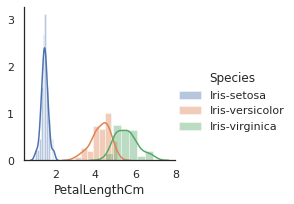

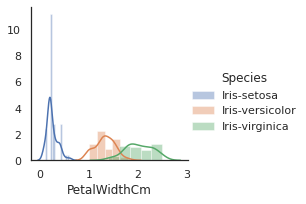

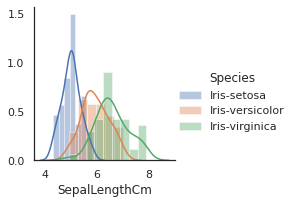

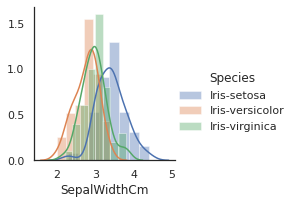

In [11]:
sns.FacetGrid(iris,hue="Species",size=3).map(sns.distplot,"PetalLengthCm").add_legend()
sns.FacetGrid(iris,hue="Species",size=3).map(sns.distplot,"PetalWidthCm").add_legend()
sns.FacetGrid(iris,hue="Species",size=3).map(sns.distplot,"SepalLengthCm").add_legend()
sns.FacetGrid(iris,hue="Species",size=3).map(sns.distplot,"SepalWidthCm").add_legend()
plt.show()

##STEP-III

###IMPLEMENTING K-MEANS CLUSTERING



####K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.
1.   Choose the number of clusters k
2. Select k random points from the data as centroids
3. Assign all the points to the closest cluster centroid
4. Recompute the centroids of newly formed clusters
5. Repeat steps 3 and 4



In [12]:
from sklearn.cluster import KMeans
wcss = []

In [13]:
x = iris.iloc[:, [0, 1, 2, 3]].values

In [14]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

#### We use the elbow method to determine the optimal number of clusters for k-means clustering

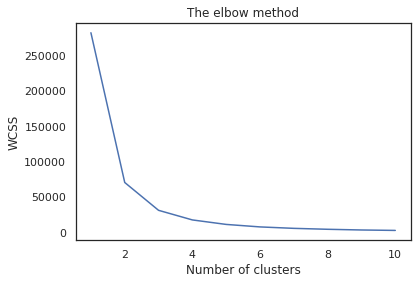

In [15]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [16]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

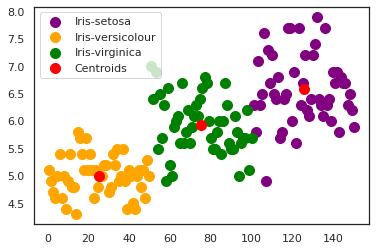

In [17]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

###From the above implementation of k-MEANS clustering , we can clearly see that the three species of flower are the three clusters and their centroids are represented by "the red colour". 

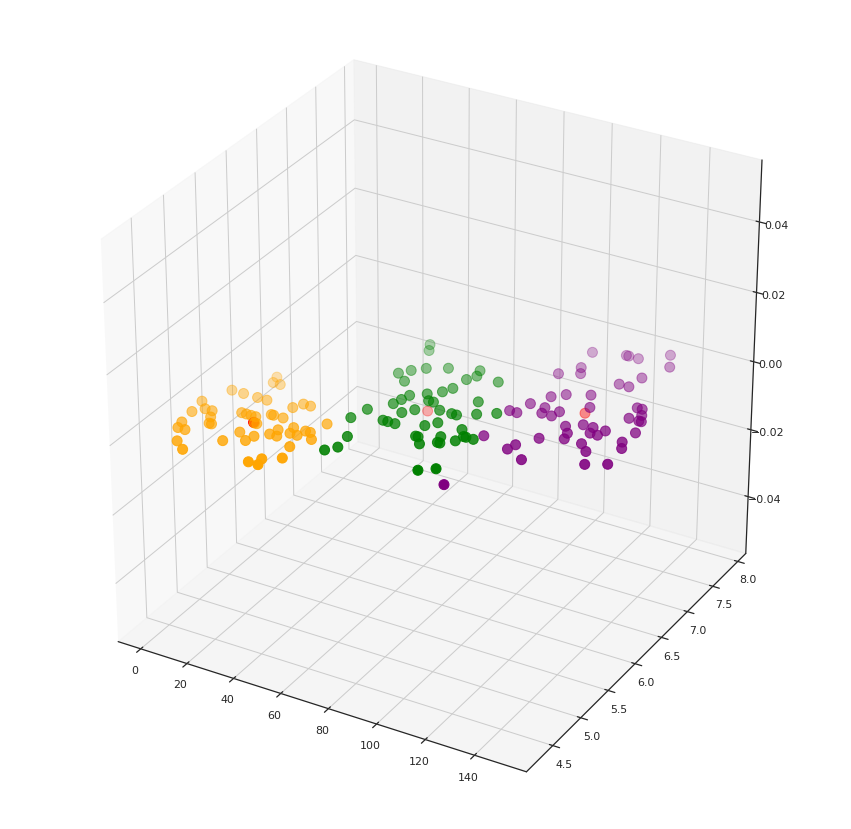

In [18]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()